# Benchmark Analysis
Benchmark data is found under /swann/benchmark

In [3]:
# Imports
import csv
import pandas as pd
import glob

In [6]:
# Helper functions

def csv_to_df(file: str):
    """ Takes in a benchmark file and returns as Pandas DataFrame """
    df = pd.read_csv(
        f'/swann/benchmark/{file}',
        header = 9
    )
    df.dropna(axis=1, inplace=True)
    return df

def get_benchmarks(p=""):
    """ Find all csv files in benchmark folder sorted by date """
    files = glob.glob(f'/swann/benchmark/{p}*.csv')
    files.sort()
    return files

def filter_df_with_wildcard_name(df: pd.DataFrame, name: str):
    """
        Example:
            - name = "LoadDatasets"
        Will return rows where name is "*LoadDatasets*"
    """
    return df.loc[df['name'].str.contains(name)]

def add_empty_time(df: pd.DataFrame, name: str):
    return pd.concat([
        pd.DataFrame(data={
            "name": [f"{name}/-1"],
            "iterations": [1],
            "real_time": [0],
            "cpu_time": [0],
            "time_unit": ["ms"],
            "input_size": [0]
        }),
        df
    ], ignore_index=True)

In [7]:
for bm in get_benchmarks('hasc/'):
    print(f'[+] {bm}')

[+] /swann/benchmark/hasc/benchmark-after-bucketiterator.csv
[+] /swann/benchmark/hasc/benchmark-after-depth2.csv
[+] /swann/benchmark/hasc/benchmark-after-depthupdate.csv
[+] /swann/benchmark/hasc/benchmark-after-hashupdate.csv
[+] /swann/benchmark/hasc/benchmark-after-next-optimizations.csv
[+] /swann/benchmark/hasc/benchmark-after-optimized.csv
[+] /swann/benchmark/hasc/benchmark-after-pointmap.csv
[+] /swann/benchmark/hasc/benchmark-optimal.csv


### How to load a dataset

In [8]:
# Load benchmark that has loading / parsing of datasets of size XS and S
df_bm_loadparse = csv_to_df('hasc/benchmark-optimal.csv')
df_bm_loadparse

,name,iterations,real_time,cpu_time,time_unit,foundPerQuery,kNN,recall,slowestQuery,timePerQuery,trie_count,trie_depth
0,QueryXPointsLSHForest/0/10/90/manual_time,1,14669.7,14689.9,ms,10200.6,10,0.94142,0.009807,0.001467,31,13
1,QueryXPointsLSHForest/1/10/90/manual_time,1,41153.2,41180.0,ms,22331.3,10,0.95326,0.023484,0.004115,54,15
2,QueryXPointsLSHForest/2/10/90/manual_time,1,475854.0,475911.0,ms,173635.0,10,0.93758,0.136457,0.047585,158,19


# Visualize data

### Benchmark Query

In [53]:
df_bm_query = csv_to_df("hasc/benchmark-optimal.csv")

df_query = filter_df_with_wildcard_name(df_bm_query, "QueryXPointsLSHForest")

# Set input size
df_query.at[0, 'input_size'] = "100.000"
df_query.at[1, 'input_size'] = "300.000"
df_query.at[2, 'input_size'] = "10.000.000"

df_query.at[0, 'input_size_val'] = 100_000
df_query.at[1, 'input_size_val'] = 300_000
df_query.at[2, 'input_size_val'] = 10_000_000


# Show in ms
df_query.at[0, 'timePerQuery'] *= 1_000
df_query.at[1, 'timePerQuery'] *= 1_000
df_query.at[2, 'timePerQuery'] *= 1_000

df_query

,name,iterations,real_time,cpu_time,time_unit,foundPerQuery,kNN,recall,slowestQuery,timePerQuery,trie_count,trie_depth,input_size,input_size_val
0,QueryXPointsLSHForest/0/10/90/manual_time,1,14669.7,14689.9,ms,10200.6,10,0.94142,0.009807,1.46697,31,13,100.000,100000.0
1,QueryXPointsLSHForest/1/10/90/manual_time,1,41153.2,41180.0,ms,22331.3,10,0.95326,0.023484,4.11532,54,15,300.000,300000.0
2,QueryXPointsLSHForest/2/10/90/manual_time,1,475854.0,475911.0,ms,173635.0,10,0.93758,0.136457,47.58540,158,19,10.000.000,10000000.0


In [18]:
import matplotlib.pyplot as plt

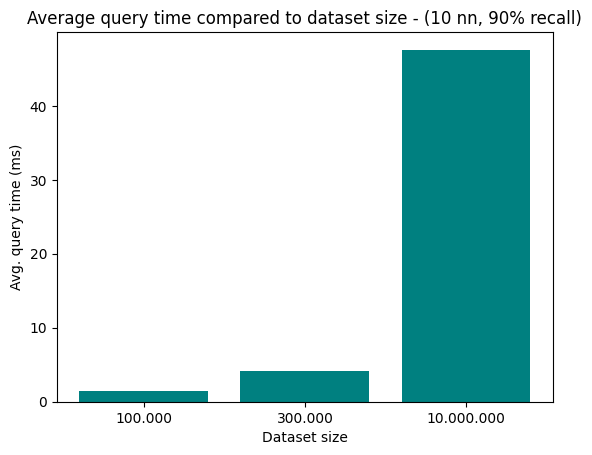

In [62]:
plt.bar(df_query['input_size'], df_query['timePerQuery'], color = 'teal')
plt.xlabel("Dataset size")
plt.ylabel("Avg. query time (ms)")
plt.title("Average query time compared to dataset size - (10 nn, 90% recall)")
plt.show()

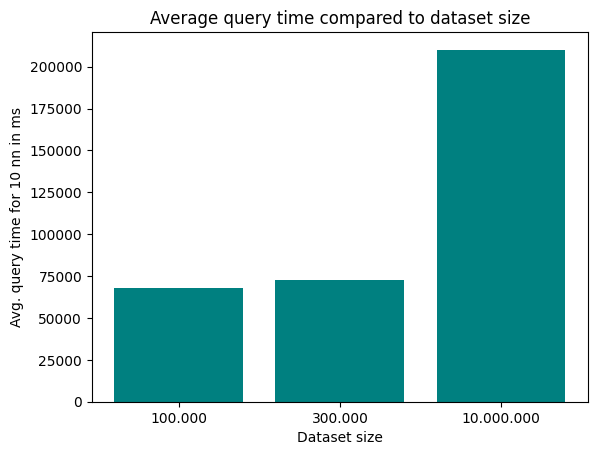

In [59]:
plt.bar(df_query['input_size'], df_query['input_size_val']/df_query['timePerQuery'], color = 'teal')
plt.xlabel("Dataset size")
plt.ylabel("Avg. query time for 10 nn in ms")
plt.title("Average query time compared to dataset size")
plt.show()

Text(0, 0.5, 'Time (ms)')

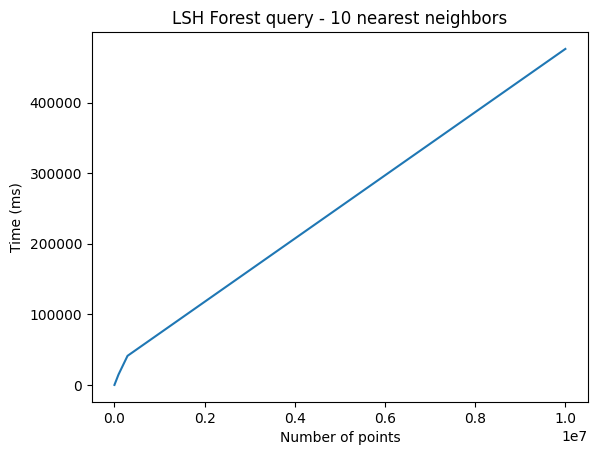

In [17]:
df_query_line = df_query.plot.line(title='LSH Forest query - 10 nearest neighbors', x='input_size', y='cpu_time', legend=False)
df_query_line.set_xlabel("Number of points")
df_query_line.set_ylabel("Time (ms)")

### Loading of dataset

In [5]:
df_load = filter_df_with_wildcard_name(df_bm_loadparse, "LoadDatasets")
df_load_0 = pd.DataFrame(data={
    "name": ["LoadDatasets/000000"],
    "iterations": [1],
    "real_time": [0],
    "cpu_time": [0],
    "time_unit": ["ms"],
    "input_size": [0]
})
df_load = pd.concat([df_load_0, df_load])
df_load

,name,iterations,real_time,cpu_time,time_unit,input_size
0,LoadDatasets/000000,1,0.00,0.00,ms,0
0,LoadDatasets/100000,1,2602.41,2532.48,ms,100000
1,LoadDatasets/300000,1,7749.27,7604.63,ms,300000


Text(0, 0.5, 'Time (ms)')

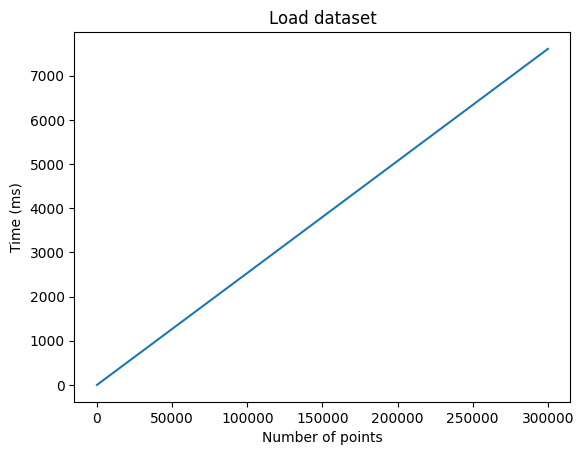

In [6]:
load_line = df_load.plot.line(title='Load dataset', x='input_size', y='cpu_time', legend=False)
load_line.set_xlabel("Number of points")
load_line.set_ylabel("Time (ms)")